In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [273]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [274]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [275]:
#Let's convert y to 1 and 0 for sake of correlation analysis
data['y'] = data['y'].replace({'no': 0, 'yes': 1})

data.describe()
#reading the data from describe function already gives us a pretty good idea of which columns might have outliers and their distributions, 
#like 'previous' column quartiles and max(campaign) = 56 look weird, who will have 56 contacts especially considering the iqr we can also deduce from the table
#we can also see that our target dataset is heavily unbalanced towards "NO" 

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_80491/402361533.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['y'] = data['y'].replace({'no': 0, 'yes': 1})


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [276]:
#To understand what values we are dealing with
for col in data:
    print(col)
    print(data[col].unique())

#You can obviously see how pdays = 999 is wrong, when the max after this is 27 so let's work on it
#But the data we know assumes that pdays = -1 means that no previous contact has been made, and with 
#it forming 99% of our data, 999 was meant to be -1
(data['pdays'] == 999).value_counts()
data['pdays'] = data['pdays'].replace({999: -1})

#there also seems to be missing "unknown" or "nonexistent" variables in some categorical columns

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration
[ 261  149  226 ... 1246 1556 1868]
campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays
[999

In [277]:
data['previous'].value_counts()
#looks fine considering what column 'previous' is, numbers of contacts before this campaign, we leave it how it is

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [278]:
#addressing the missing values
categorical = data.select_dtypes(include=['object']).columns.to_list()

for col in categorical:
    print (col, (data[col] == 'unknown').sum(), (data[col] == 'nonexistent').sum())

#we see a some unknown values which we will now impute
#"nonexistent" ended up being a property and not a missing value, in this case it means the person didn't participate in the previous campaign
#we will leave it untouched

job 330 0
marital 80 0
education 1731 0
default 8597 0
housing 990 0
loan 990 0
contact 0 0
month 0 0
day_of_week 0 0
poutcome 0 35563


In [279]:
#impute the unknown values with the mode
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    #print(data[col].value_counts())
    mode = data[col].mode()[0] 
    data[col] = data[col].replace('unknown', mode)

In [280]:
def find_outliers_iqr(data):
    Q1 = np.nanpercentile(data, 25)
    Q3 = np.nanpercentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    #print(f"Lower Bound: {IQR}, Upper Bound: {upper_bound}")
    return (data < lower_bound) | (data > upper_bound)

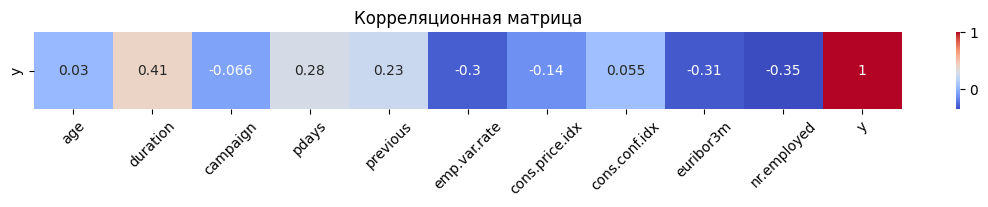

In [281]:
#['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y]
numeric = data.select_dtypes(include=np.number).columns.tolist()

correlation = data[numeric].corr()
#print(correlation)
plt.figure(figsize=(14, 1))
sns.heatmap(correlation.iloc[10:11], annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.xticks(rotation=45)
plt.show()

#As we see the features we most care about will be duration, emp.var.rate, .euribor3m, nr.employed
#We will give special attention to them and use the IQR method on other features in need of pre-processing
#We addressed the issue with both pdays and previous before

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


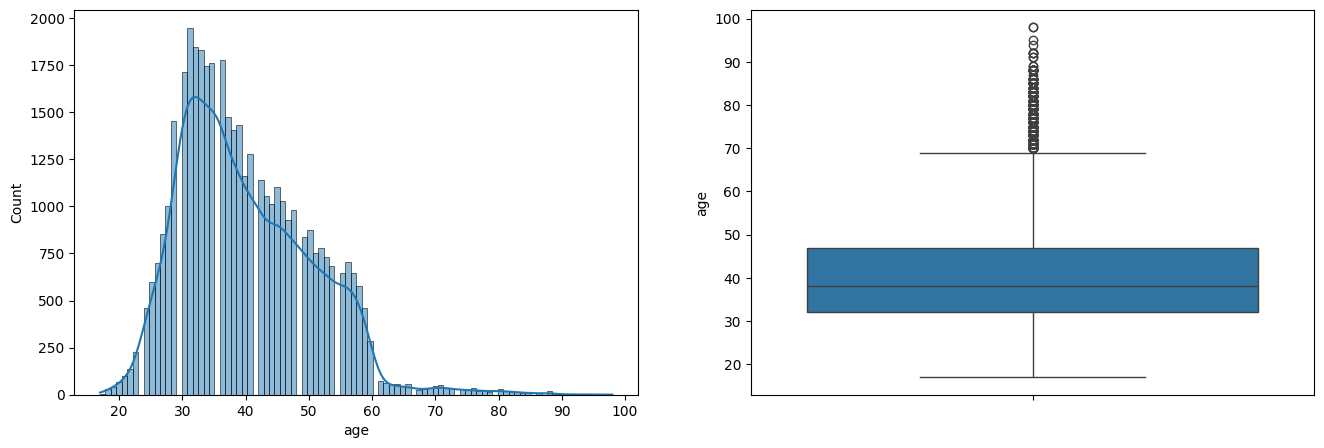

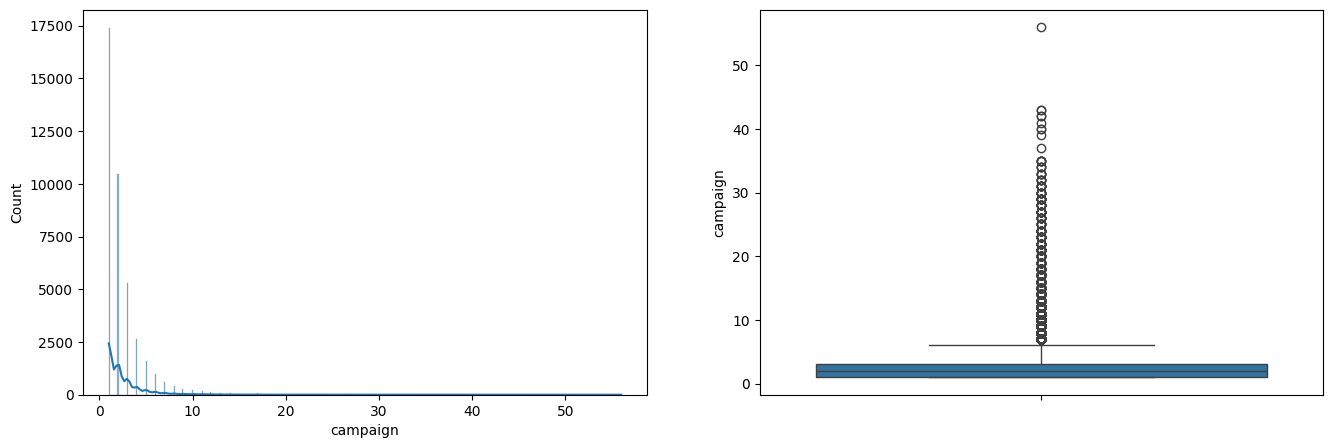

In [282]:
#Choose the features we haven't done before and know from observation are in need of preprocessing
worth = ['age', 'campaign']
for col in ['age', 'campaign']: 
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(data[col])

    mask = find_outliers_iqr(data[col])
    data = data[~mask]

#This confirmed the info we received from describe(), our numerical values don't follow
#normal distribution, so z-score method is not viable. The box-plot also shows a lot of outliers
#but the dataset is too big for tests like shapiro-wilk and a-like based on p-value to work effectively, therefore IQR will be used
#another method for 'age' columns could be a mask age < 60 based on inference due to the sudden drop
#IQR is used after the plots are made, so the plots are before the outlier removal


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


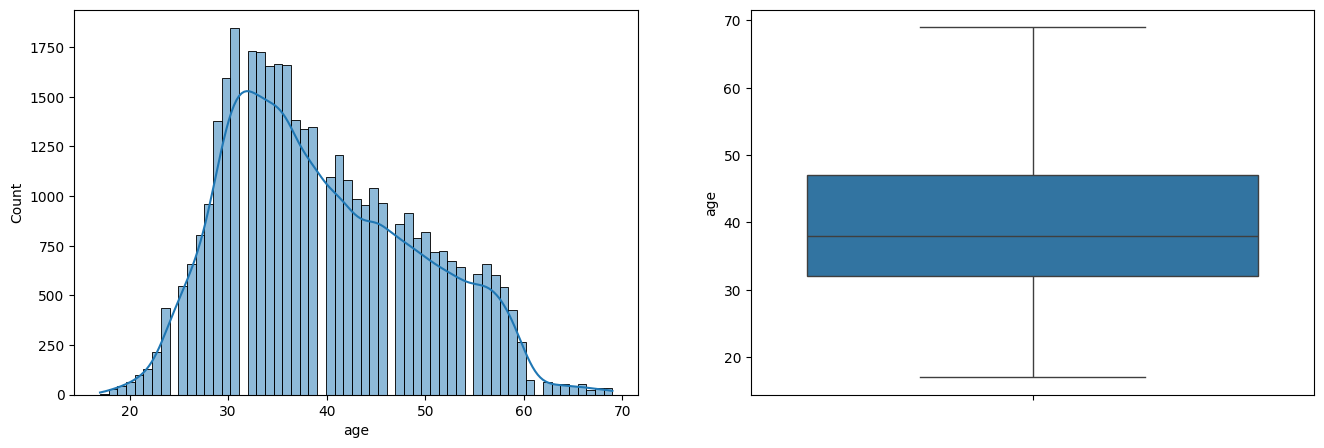

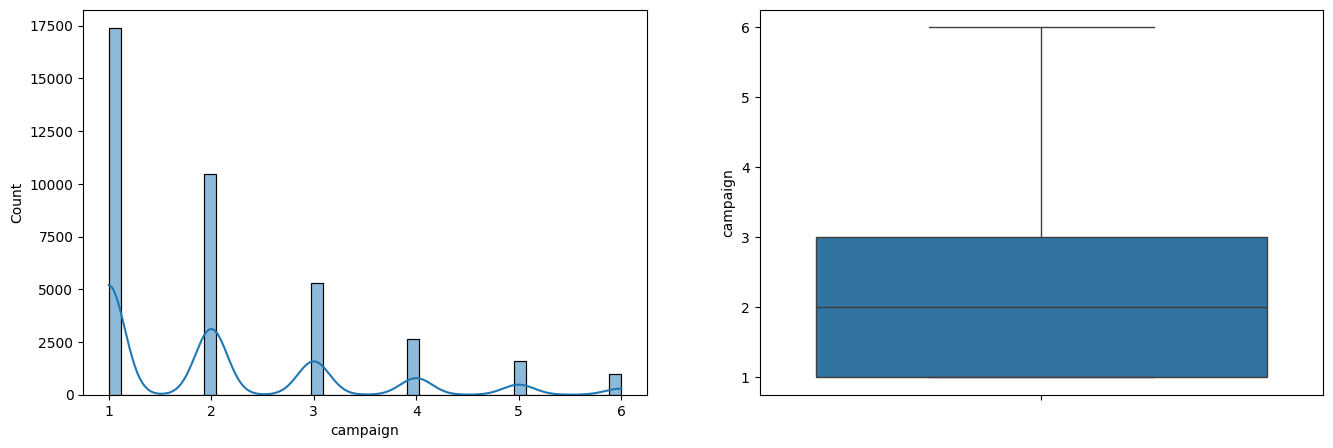

In [283]:
for col in ['age', 'campaign']: 
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(data[col])

#Showcase the new processed data, this looks much more gaussian-like and generally better
    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be remo

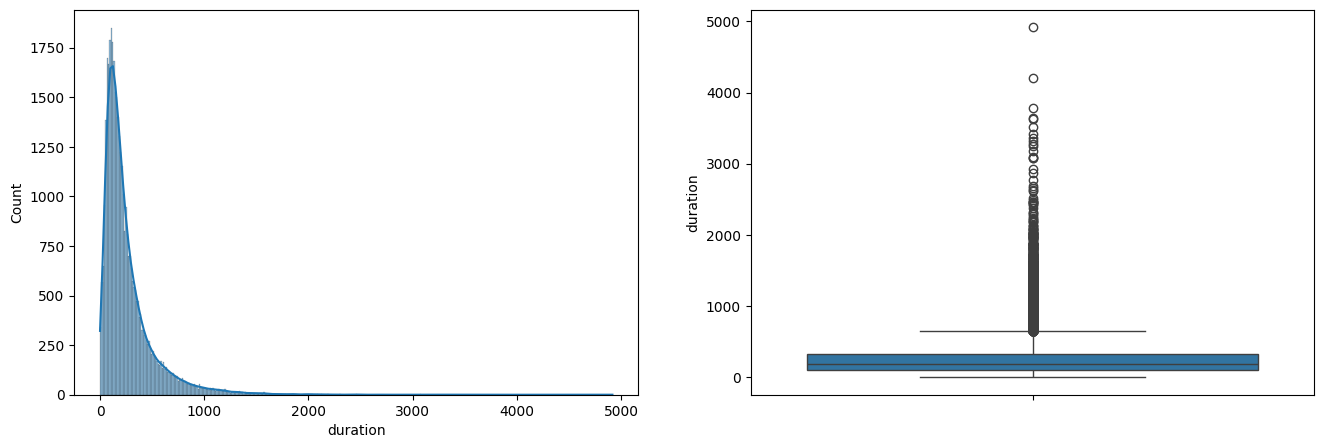

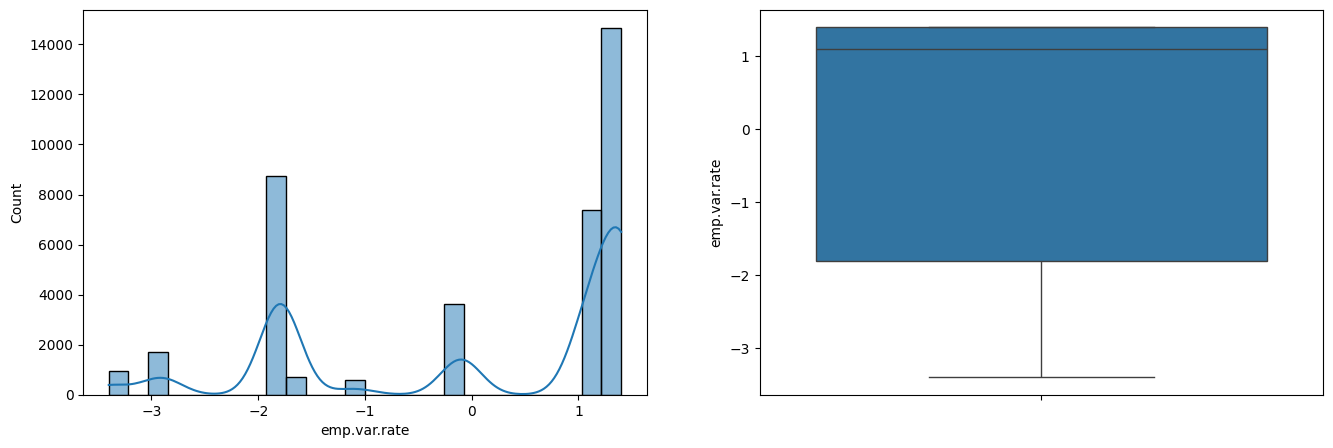

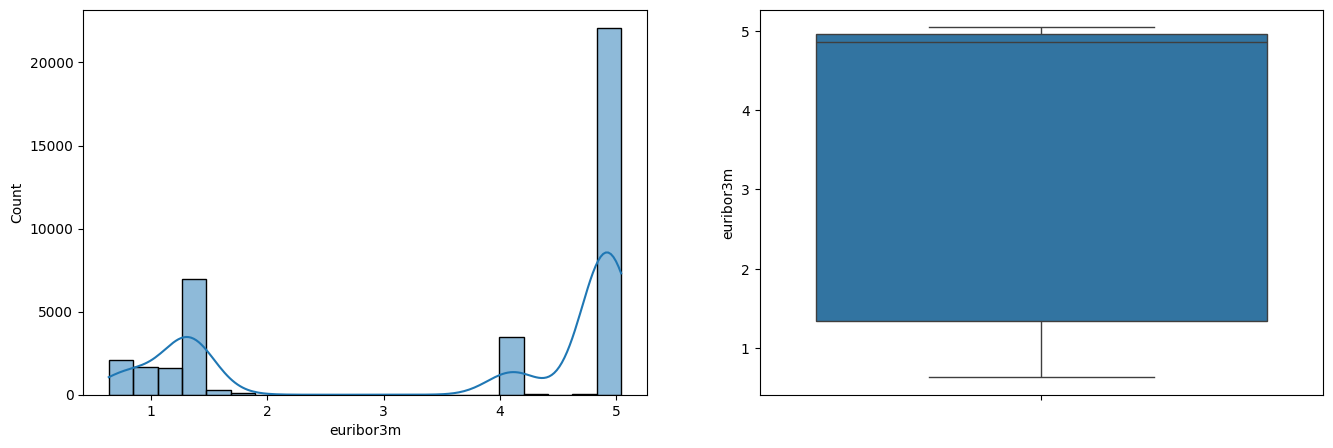

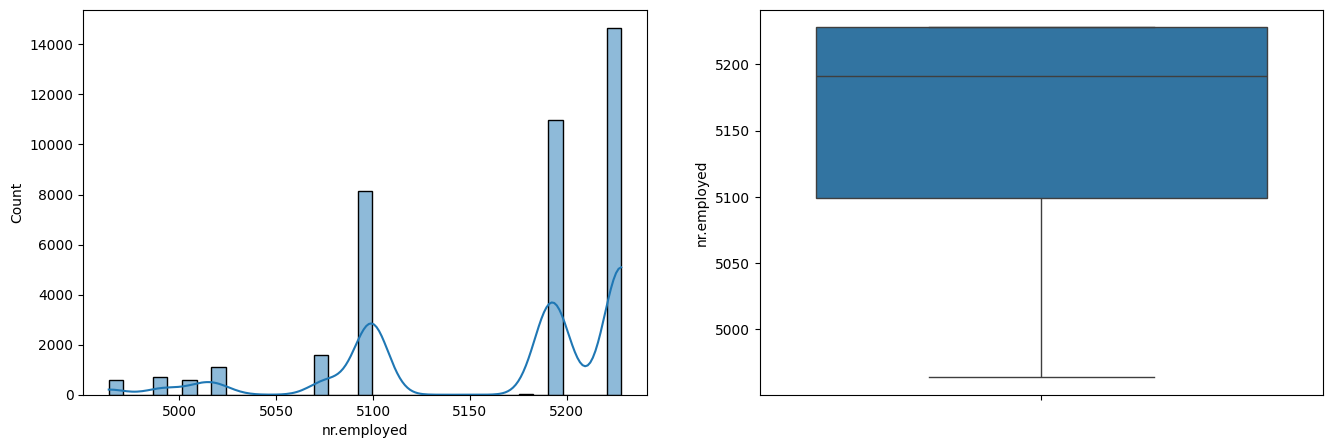

In [284]:
for col in ['duration', 'emp.var.rate', 'euribor3m', 'nr.employed']:
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(data[col])

#Duration seems to have quite a bit of outliers due to having skewed data to left, IQR won't be used as it
#significantly reduced the correlation quofficient in testing and it doesn't make sense knowing the nature of the duration column
#99% percentile data will be removed instead. //5000 seconds ~ 83 minutes
    
#The other 3 variables seem to not have outliers given the boxplot but are heavily right skewed, we will leave it as it is


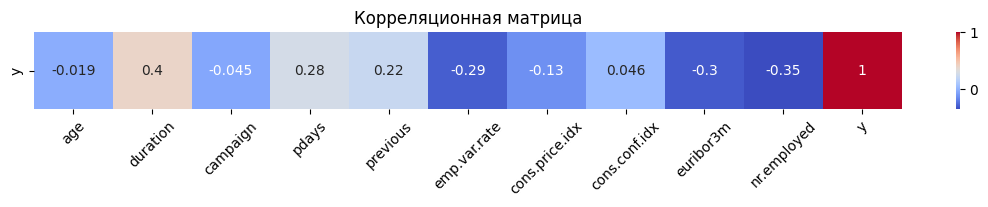

In [285]:
correlation = data[numeric].corr()
#print(correlation)
plt.figure(figsize=(14, 1))
sns.heatmap(correlation.iloc[10:11], annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.xticks(rotation=45)
plt.show()

#All looks good, marginal correlation loss but is now much more accurate

In [286]:
data[categorical].describe()


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,38327,38327,38327,38327,38327,38327,38327,38327,38327,38327
unique,11,3,7,2,2,2,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent
freq,10080,23225,12941,38324,21022,32514,24489,13078,7986,33002


In [287]:
print(data['job'].unique())
print(data['education'].unique())

#You can see that you can create an order for 'education' part and it will make sense, the higher the number the higher the education level
#This same pattern can't really be seen in 'job' as some are very similar between themselves, an enterpreneur can be a billionaire or a homeless guy with a startup.
#Thus label/ordinal encoding will be used on education
print(data['education'].value_counts())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
education
university.degree      12941
high.school             8952
basic.9y                5711
professional.course     4886
basic.4y                3673
basic.6y                2148
illiterate                16
Name: count, dtype: int64


In [288]:
#Label encoding of education using the replace function and a dictionary to fit our desired order

labels = {
    'illiterate':1,
    'basic.4y':2,
    'basic.6y':3,
    'basic.9y':4, 
    'high.school':5, 
    'professional.course':6,
    'university.degree':7
}
    
data['education'] = data['education'].replace(labels)
data['education'].value_counts()
#Label encoding done in the right order as you see the list matching, Nice

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_80491/1610654273.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace(labels)


education
7    12941
5     8952
4     5711
6     4886
2     3673
3     2148
1       16
Name: count, dtype: int64

In [289]:
#one-hot encode the rest

for col in ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']:
    if (data[col].unique().size == 2):
        data[col] = data[col].replace({'no': 0, 'yes': 1})
    else:
        #one hot encode using pandas get_dummies
        #drop_first=True drops one column so we avoid the problem of multicollinearity
        dummies = pd.get_dummies(data[col], columns=[col], dtype=int, drop_first=True)
        data = pd.concat([data, dummies], axis=1)
        data.drop(col, axis=1, inplace=True)


#Notice how we left the 'month' untouched for now, let's use it to create a new feature which might be useful        

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_80491/746563593.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'no': 0, 'yes': 1})


In [290]:
#As we know from the dataset providers information, the dataset is in month order spanning 3 years so we can extract these years.

data['year'] = 2018

prev = 'jan'
time = 0
def to_year(row):
    global time, prev
    #if the previous month was december and current is different, it means we came to another year
    if ((prev == 'dec') & (row['month'] != 'dec')):
        time += 1
    prev = row['month']
    return row['year'] + time

data['year'] = data.apply(to_year, axis=1)

print(data['year'].head())
print(data['year'].tail())
#Works
#Why do I think this feature is useful? Different times = different economies
#There is the possibility of this being a bad choice since the "economy scale" between
#years is probably not linear thus one hot encoding like method should have been used

0    2018
1    2018
2    2018
3    2018
4    2018
Name: year, dtype: int64
41181    2020
41182    2020
41184    2020
41185    2020
41186    2020
Name: year, dtype: int64


In [291]:
#Let's hot encode the 2 missing columns and 'contact' which our first parse missed as it has only 2 features but they aren't yes/no
for col in ['year', 'month', 'contact']:
    dummies = pd.get_dummies(data[col], columns=[col], dtype=int, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

#Although 'year' is already numeric, there isn't an increase between the years of something behind time itself which is abstract as it carries in itself other events 
#and isn't really 'linear' if you think about it so label encoding is used. 
#No useful second feature can be conjured, so I made 1

In [292]:
#We need to test these models: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting (например, XGBoost или LightGBM), Support Vector Machine (SVM)
#For each module: 
data.columns = data.columns.astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38327 entries, 0 to 41186
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38327 non-null  int64  
 1   education       38327 non-null  int64  
 2   default         38327 non-null  int64  
 3   housing         38327 non-null  int64  
 4   loan            38327 non-null  int64  
 5   duration        38327 non-null  int64  
 6   campaign        38327 non-null  int64  
 7   pdays           38327 non-null  int64  
 8   previous        38327 non-null  int64  
 9   emp.var.rate    38327 non-null  float64
 10  cons.price.idx  38327 non-null  float64
 11  cons.conf.idx   38327 non-null  float64
 12  euribor3m       38327 non-null  float64
 13  nr.employed     38327 non-null  float64
 14  y               38327 non-null  int64  
 15  blue-collar     38327 non-null  int64  
 16  entrepreneur    38327 non-null  int64  
 17  housemaid       38327 non-null  int6

In [293]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

scores_lists = []

def getStats(y_test, y_pred, probabilities):
    scores = []
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, probabilities[:,1])
    scores_lists.append([accuracy, precision, recall, f1, auc_roc])


    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC-ROC Score: {auc_roc:.2f}")

    fpr, tpr, _ = roc_curve(y_test, probabilities[:,1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    

    

In [294]:
from sklearn.preprocessing import StandardScaler

X = data.drop(['y'], axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['y'])

scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Distance-based ML models rely on gradient descent thus the variables having the same scale 
#is a must for them to work accurately or even work at all

In [295]:
from imblearn.over_sampling import SMOTE

#In order to address the heavy target imbalance we use smote method
#Smote is only applied on training data so the testing data retains its composition 
#so we test our model on the real data we might face again in real problem
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


y_train_smote.value_counts()

y
0    27211
1    27211
Name: count, dtype: int64

Accuracy: 0.87
Precision: 0.45
Recall: 0.87
F1 Score: 0.59
AUC-ROC Score: 0.94


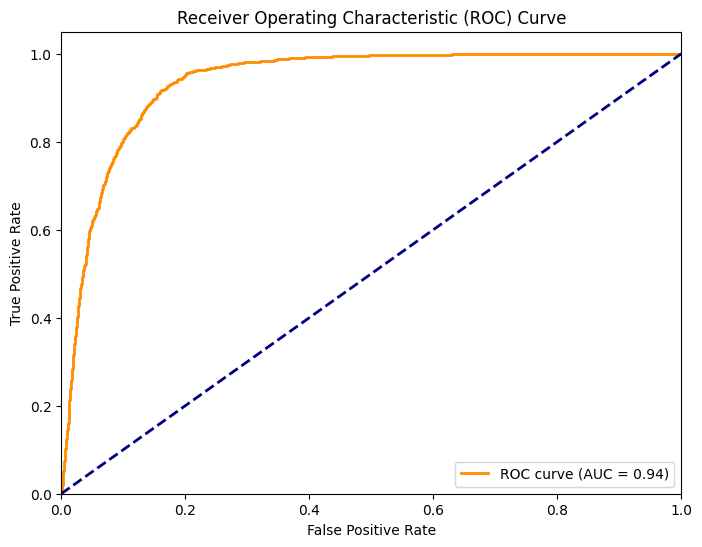

In [296]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

#default max_iter = 100 was exceeded when testing on raw data without addressing the scaling and target imbalance
#scaling fixed it but applying smote made our model too heavy for max_iter = 120 so a custom one was used to make it finish converging

model = LogisticRegression(random_state=42, max_iter=120)
model.fit(x_train_smote, y_train_smote)


# Make predictions on the test set
y_pred_log = model.predict(X_test_scaled)
probabilities = model.predict_proba(X_test_scaled)
getStats(y_test, y_pred_log, probabilities)



Accuracy: 0.88
Precision: 0.48
Recall: 0.55
F1 Score: 0.51
AUC-ROC Score: 0.74


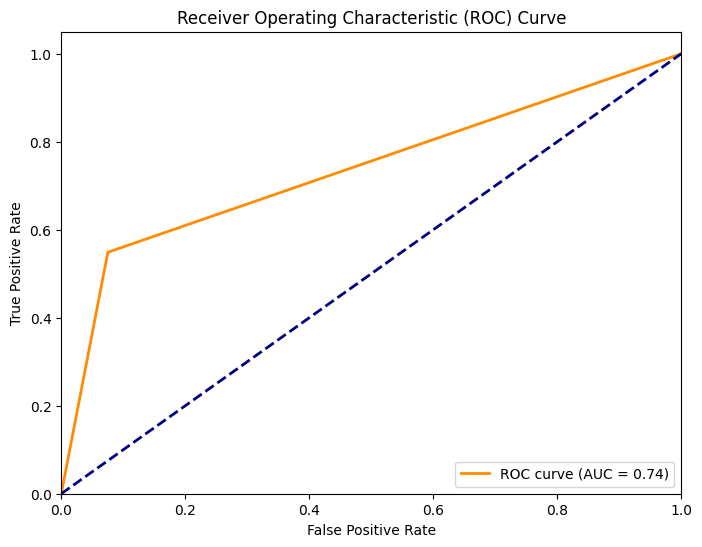

In [297]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train_smote, y_train_smote)

y_pred_tree = clf.predict(X_test_scaled)
probabilities = clf.predict_proba(X_test_scaled)
getStats(y_test, y_pred_tree, probabilities)



Accuracy: 0.91
Precision: 0.59
Recall: 0.63
F1 Score: 0.61
AUC-ROC Score: 0.94


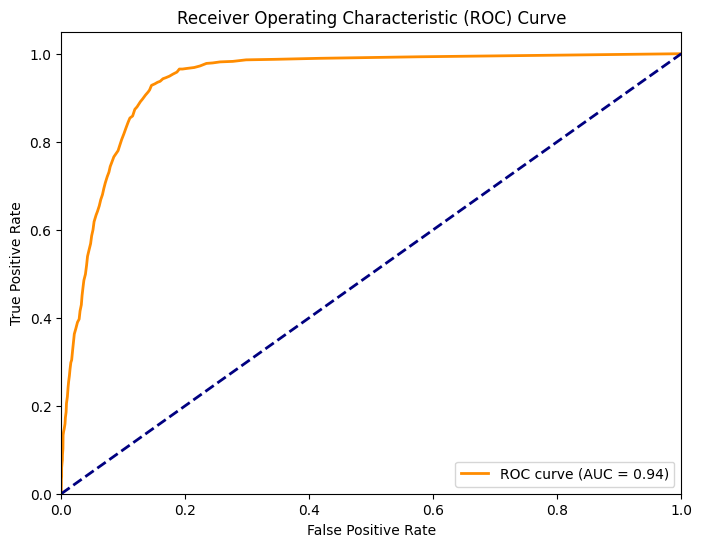

In [298]:
#Random forest

from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_forest = rf_clf.predict(X_test_scaled)
probabilities = rf_clf.predict_proba(X_test_scaled)
getStats(y_test, y_pred_forest, probabilities)

Accuracy: 0.90
Precision: 0.52
Recall: 0.78
F1 Score: 0.63
AUC-ROC Score: 0.94


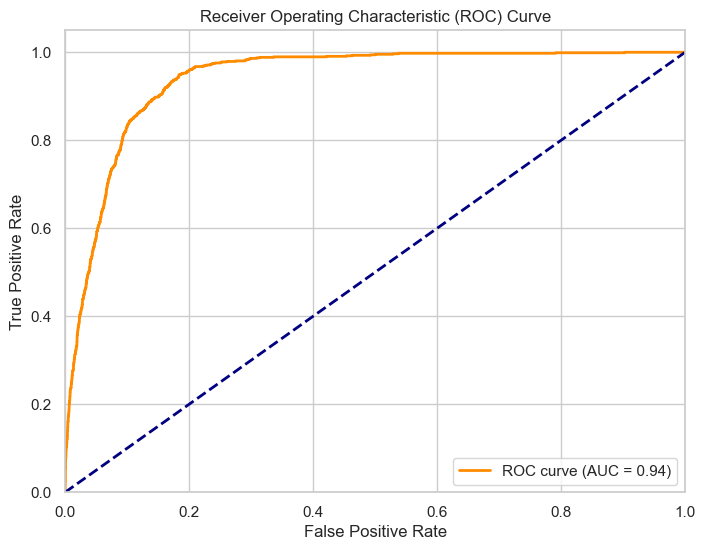

In [334]:
#Gradient boosting
#It is a distance based algorithm so therefore scaled data should be used if we want to have an accurate model
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(x_train_smote, y_train_smote)

# Step 3: Make predictions and validate
y_pred_gb = gb_clf.predict(X_test_scaled)
probabilities = gb_clf.predict_proba(X_test_scaled)

getStats(y_test, y_pred_gb, probabilities)


Accuracy: 0.87
Precision: 0.46
Recall: 0.82
F1 Score: 0.59
AUC-ROC Score: 0.93


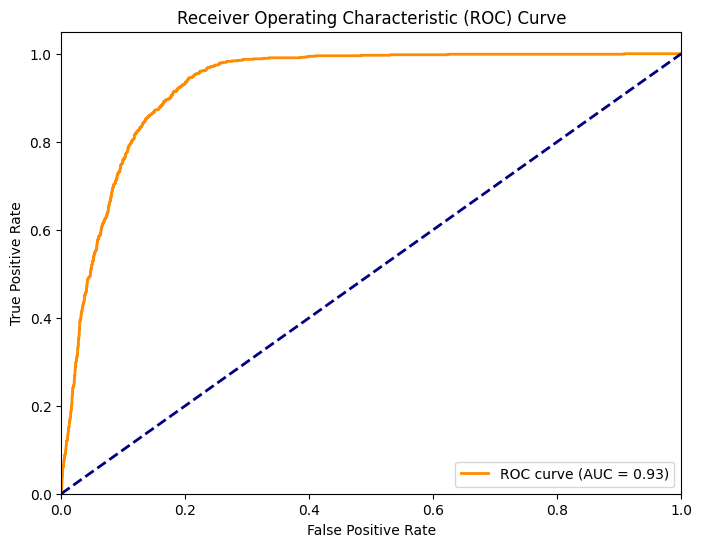

In [300]:
#Support Vector Machine (SVM)
#It is a distance based algorithm so therefore scaled data should be used if we want to have an accurate model
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score


'''kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        clf = svm.SVC(kernel=kernel, C=C)
        clf.fit(x_train_smote, y_train_smote)
        
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
    
        
        print(f"Kernel: {kernel}, C: {C}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"f1-score: {f1:.4f}")'''


svm_clf = svm.SVC(probability=True)
svm_clf.fit(x_train_smote, y_train_smote)

y_pred_svm = svm_clf.predict(X_test_scaled)
probabilities = svm_clf.predict_proba(X_test_scaled)
getStats(y_test, y_pred_svm, probabilities)





In [332]:
columns = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
clfs = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']
from tabulate import tabulate


# Constructing a table
df = pd.DataFrame(scores_lists, columns=columns)
df.index = clfs

# Display the table
#print(tabulate(df, headers=columns))
df.head()

,Accuracy,Precision,Recall,F1,ROC_AUC
Logistic Regression,0.866684,0.451691,0.867749,0.594122,0.936757
Decision Tree,0.882598,0.480691,0.548724,0.512459,0.736811
Random Forest,0.908949,0.588362,0.633411,0.610056,0.939265
Gradient Boosting,0.895904,0.524883,0.783063,0.628492,0.939652
SVM,0.870989,0.459006,0.824826,0.589797,0.928409


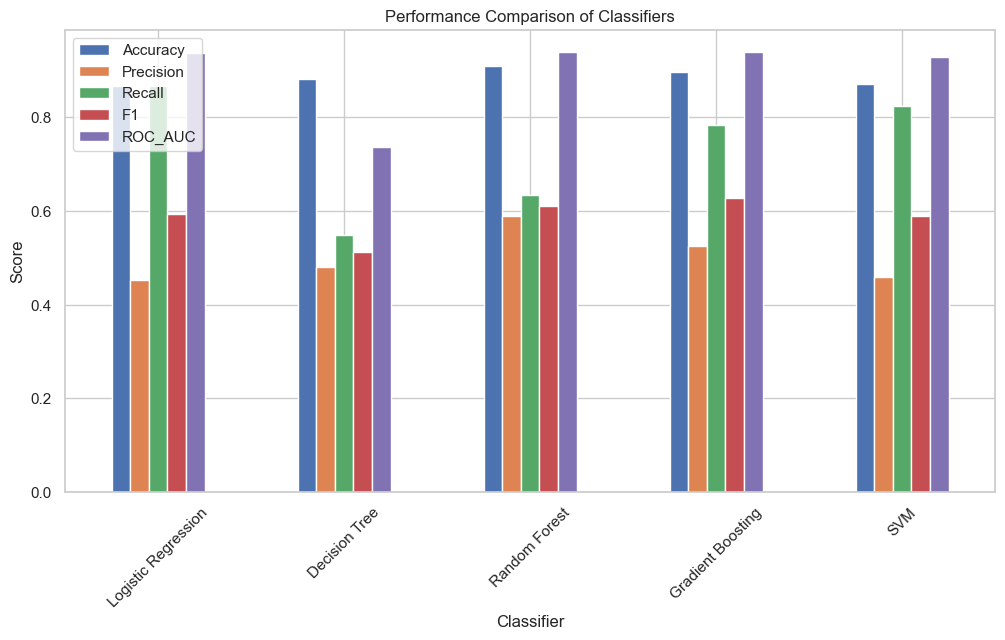

In [331]:
# Plot a grouped bar chart
df.plot(kind='bar', figsize=(12, 6))
plt.title('Performance Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()


As we can see from the table and the graph above, all the classifiers have a high (> 0.8) accuracy and ROC_AUC score, th only classifier seen lacking in this department seems Decision tree with ROC_AUC score 0.73 which is considerably lower than the 0.93 of the other classifiers. A high accuracy means that the model makes a lot of correct overall predictions and the high AUC_score means that our models can correctly differentiate between classes. Gradient boosting performs the best in this followed closely by random forest. Precision is a metric of how many instances which were classified as positive ended up being actual positives and Recall also known as true positive is a metric of how many actual positives our model got correct. Recall is high in Logistic Regression, Gradient Boosting and SVM (~0.8) while it is around 0.6~ for the rest. These models however have a lower precision than the rest thus lower the f1 score, the harmonious average of both aforementioned metrics. In our case precision and recall are equally important thus the f1 score will be used to pick our 2 best models with highest said scores - Gradient Boosting and Random Forest. Even though there are 2 models very close to Random Forest's, Random Forest has very similar Precision and Recall values thus will be our choice.

In [353]:
print("Gradient Boosting Hyperparameter Tuning")

from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=False)
#5 fold kfold validation

score = cross_val_score(gb_clf, x_train_smote, y_train_smote, cv=kf, scoring='f1')
gb_cv_score = score.mean()
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', gb_cv_score)

#As we can see, the cross-validation scores for f1 used on the training data are higher than 
#what we received from our gradient boosting classifier when tested on the testing dataset (0.63)
#this implies that our model is overfitting

Gradient Boosting Hyperparameter Tuning
Cross Validation f1 scores are: [0.62437186 0.61643429 0.85389512 0.98446466 0.98337381]
Average Cross Validation f1 score:  0.8125079482410769


In [351]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_train_smote, y_train_smote)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model for prediction
best_gb_clf = grid_search.best_estimator_
y_pred_best = best_gb_clf.predict(X_test)




Step 4: Hyperparameter Tuning


177435.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177435.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177435.01s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177435.03s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177435.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177435.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177435.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177435.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177435.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
177435.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It s

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best cross-validation score: 0.94930490441904


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.11
Precision: 0.11
Recall: 1.00
F1 Score: 0.20
AUC-ROC Score: 0.94


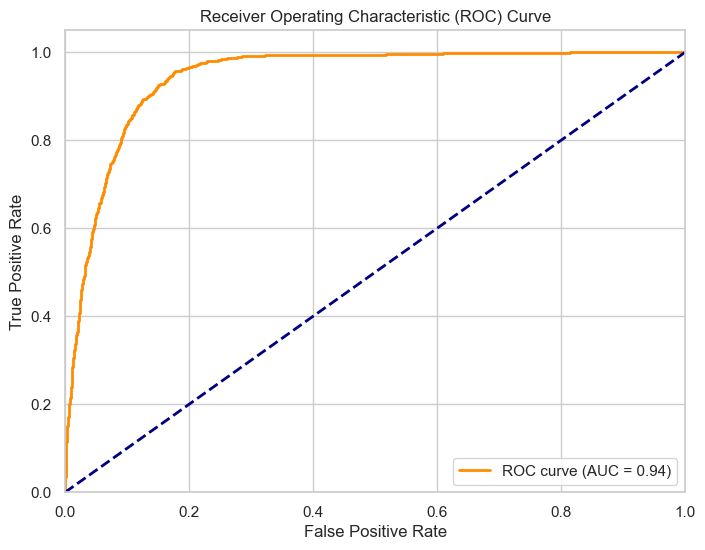

In [352]:
probabilities = best_gb_clf.predict_proba(X_test_scaled)
getStats(y_test, y_pred_best, probabilities)

#gradient boosting clf before tuning: 0.895904	0.524883	0.783063	0.628492	0.939652
#As we see, the scores values after tuning hyper parameters generally became much worse except for
#Recall which became a perfect 1.0, meaning our model caught all actual positives but with such poor performance on
#other metrics the tuned model is unacceptable, the initial model is probably overfitting

In [354]:
print("Gradient Boosting Hyperparameter Tuning")

score = cross_val_score(rf_clf, x_train_smote, y_train_smote, cv=kf, scoring='f1')
rf_cv_score = score.mean()
print('Cross Validation f1 scores are: {}'.format(score))
print('Average Cross Validation f1 score: ', rf_cv_score)

#As we can see, the cross-validation scores for f1 used on the training data are higher than 
#what we received from our gradient boosting classifier when tested on the testing dataset (0.61)
#this implies that our model is overfitting

Cross Validation f1 scores are: [0.70342466 0.69872424 0.89201438 0.99797459 0.99700502]
Average Cross Validation f1 score:  0.8578285773786266


In [355]:
print("Random ForestHyperparameter Tuning")

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=kf, n_jobs=-1)
grid_search.fit(x_train_smote, y_train_smote)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)



Random ForestHyperparameter Tuning


184892.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
184892.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
184892.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
184892.63s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
184892.63s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
184892.64s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
184892.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
184892.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
184892.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
184892.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It s

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score: 0.9528328553314639


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.11
Precision: 0.11
Recall: 1.00
F1 Score: 0.20
AUC-ROC Score: 0.94


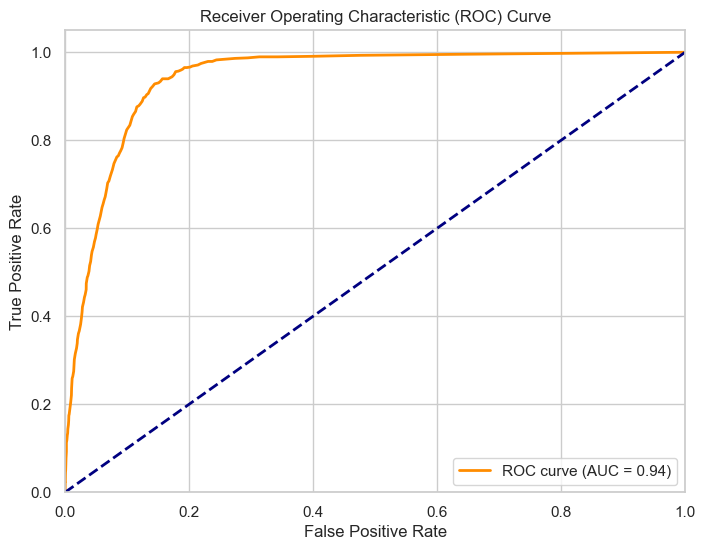

In [356]:
# Use the best model for prediction
best_rf_clf = grid_search.best_estimator_
y_pred_rf_best = best_rf_clf.predict(X_test)

probabilities = best_rf_clf.predict_proba(X_test_scaled)
getStats(y_test, y_pred_best, probabilities)

#Same outcome as before, our model got overfitted on the training dataset